In [127]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from sklearn import datasets
from mlxtend.data import loadlocal_mnist
from mlxtend.plotting import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np

1. Menyimpan dataset ke dalam Variabel

In [128]:
train_images, train_labels = loadlocal_mnist(images_path='train-images.idx3-ubyte',
                                             labels_path='train-labels.idx1-ubyte')


In [129]:
test_images, test_labels = loadlocal_mnist(images_path='t10k-images.idx3-ubyte',
                                             labels_path='t10k-labels.idx1-ubyte')

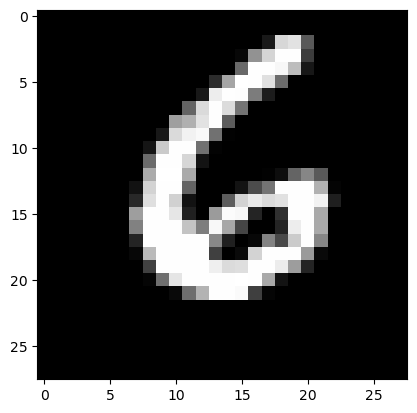

In [130]:
plt.imshow(train_images[90].reshape(28,28), cmap='gray')

In [131]:
train_labels[90]

6

2. Ekstraksi fitur menggunakan metode HOG (Histogram of Oriented Gradients) pada setiap gambar

In [132]:
X_train_reshaped = train_images.reshape(-1, 28, 28)

In [1]:
X_train_hog = []
for img in X_train_reshaped:
    features, _ = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    X_train_hog.append(features)

NameError: name 'X_train_reshaped' is not defined

In [ ]:
X_train_hog = np.array(X_train_hog)
y_train = np.array(train_labels)

In [ ]:
X_test_reshaped = test_images.reshape(-1, 28, 28)

In [ ]:
X_test_hog = []
for img in X_test_reshaped:
    features, _ = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
    X_test_hog.append(features)

In [ ]:
X_test_hog = np.array(X_test_hog)
y_test = np.array(test_labels)

3. Training process

In [2]:
svm = SVC()
svm.fit(X_train_hog, train_labels)

# Evaluasi model
accuracy = svm.score(X_test_hog, test_labels)
print(f'Accuracy: {accuracy}')

NameError: name 'SVC' is not defined

In [ ]:
y_pred = svm.predict(X_test_hog)

4. Predict test

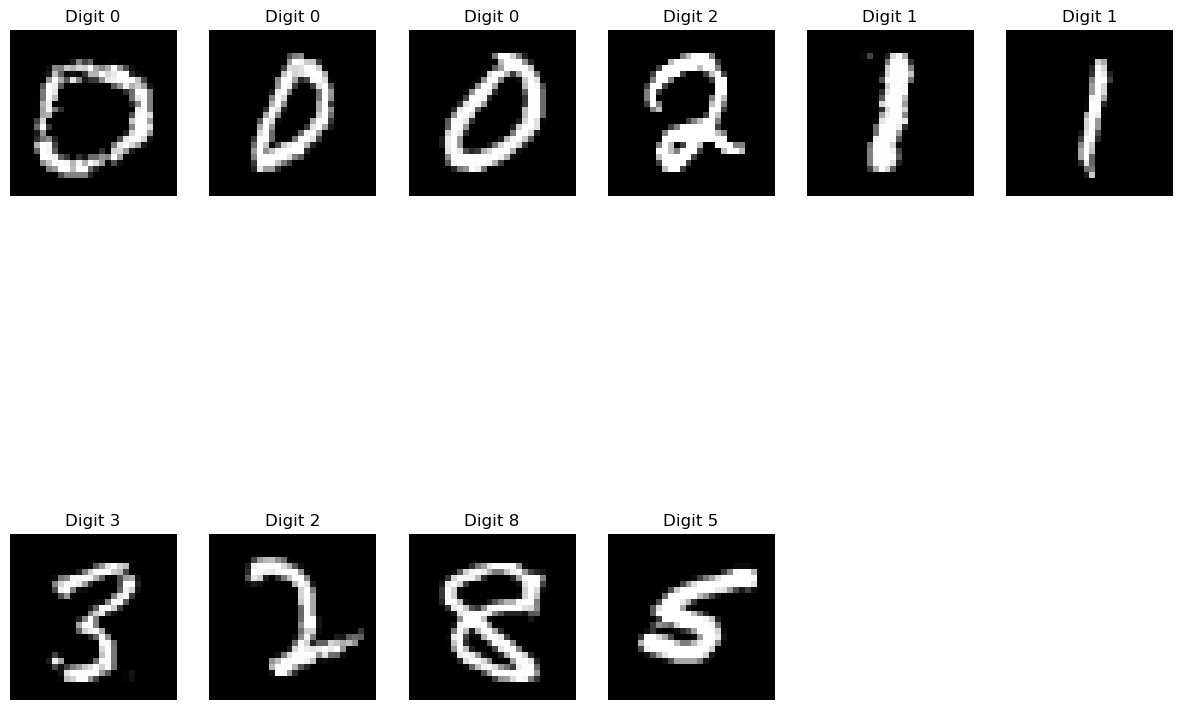

In [140]:
def prediksi(images, targets, sample_size=10, title_text='Digit {}' ):
    
    nsamples=sample_size
    rand_idx = np.random.choice(images.shape[0],nsamples)
    images_and_labels = list(zip(images[rand_idx], targets[rand_idx]))

    num_rows = int(np.ceil(nsamples / 6.0))
    img = plt.figure(1, figsize=(15, 12), dpi=100)
    for index, (image, label) in enumerate(images_and_labels):
        plt.subplot(int(np.ceil(nsamples/6.0)), 6, index + 1)
        plt.axis('off')
        

        plt.imshow(image.reshape(28,28), cmap='gray')
        plt.title(title_text.format(label))
    plt.show()
    
prediksi(test_images, y_pred)


5. Evaluation Metrics

    5. 1 Confussion Matrix

In [134]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [136]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
conf_mat

array([[ 973,    0,    1,    0,    0,    0,    5,    1,    0,    0],
       [   1, 1124,    6,    0,    2,    0,    1,    1,    0,    0],
       [   2,    0, 1011,    6,    2,    0,    1,    8,    2,    0],
       [   2,    2,    8,  979,    0,    2,    0,    4,    6,    7],
       [   4,    1,    0,    0,  950,    0,    9,    2,    2,   14],
       [   3,    0,    0,   10,    0,  865,    7,    1,    5,    1],
       [   6,    2,    1,    0,    2,    4,  940,    0,    2,    1],
       [   0,    3,   13,    3,   11,    0,    0,  981,    4,   13],
       [   6,    1,    4,   12,    2,    4,    1,    3,  934,    7],
       [   2,    3,    0,    5,   11,    4,    0,    4,   13,  967]],
      dtype=int64)

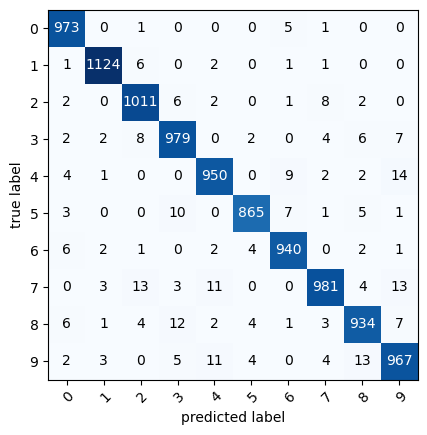

In [137]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, class_names=class_names)

5.2 Precission

In [138]:
precision = metrics.precision_score(y_test, y_pred, average=None)
precision

array([0.97397397, 0.98943662, 0.9683908 , 0.96453202, 0.96938776,
       0.98407281, 0.97510373, 0.9761194 , 0.96487603, 0.95742574])

5.3 Accuracy

In [139]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9724